# Plots of loss and accuracy over training

In [80]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

#### Function for loading results

In [81]:
def load_results(results_fn):
    results_dir = '../../results/'
    results_path = os.path.join(results_dir,results_fn)
    
    with open(results_path, 'rb') as f:
        data = pickle.load(f)
        
    results = data['results']
    losses = np.array([r['train_losses'] for r in results]).T
    train_accs = []
    test_accs = []
    analyze_accs = []
    for run in results:
        train_accs.append([s['acc'] for s in run['train_accs']])
        test_accs.append([s['acc'] for s in run['test_accs']])
        analyze_accs.append([s['acc'] for s in run['analyze_accs']])
    train_accs = np.array(train_accs)
    test_accs = np.array(test_accs)
    analyze_accs = np.array(analyze_accs)
    return losses, train_accs, test_accs, analyze_accs

#### Function for plotting loss

In [82]:
def plot_losses(losses):
    plt.plot(losses)
    plt.title("Training curve of each run")
    plt.ylabel("Loss")
    plt.xlabel("Steps")
    plt.show()

#### Function for plotting accuracies

In [83]:
def plot_accuracy(train_accs, test_accs, analyze_accs, analyze_every):
    n_runs, n_checkpoints = train_accs.shape

    # Compute mean and standard deviation for error bars
    train_mean = np.mean(train_accs, axis=0)
    test_mean = np.mean(test_accs, axis=0)
    analyze_mean = np.mean(analyze_accs, axis=0)

    train_sd = np.std(train_accs, axis=0)
    test_sd = np.std(test_accs, axis=0)
    analyze_sd = np.std(analyze_accs, axis=0)
    
    # Plot
    fig, ax = plt.subplots()
    x = np.arange(n_checkpoints)*analyze_every
    ax.errorbar(x, train_mean, yerr=train_sd, c='tab:blue')
    ax.errorbar(x, test_mean, yerr=test_sd, c='tab:green')
    ax.errorbar(x, analyze_mean, yerr=analyze_sd, c='tab:purple')
    plt.ylim([0.45, 1.05])
    plt.xlabel('Steps')
    plt.ylabel('Accuracy')
    ax.legend(["Train", "Test", "Analyze"])
    plt.show()

## MLP

In [84]:
results_fn = 'mlp.P'
analyze_every = 50

In [85]:
losses, train_accs, test_accs, analyze_accs = load_results(results_fn)

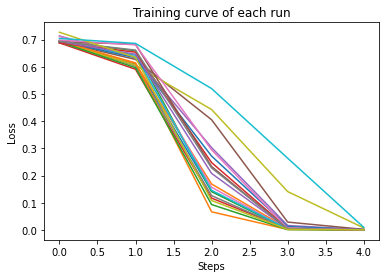

In [86]:
plot_losses(losses)

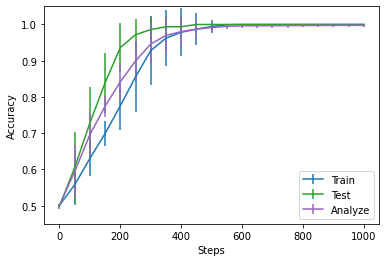

In [87]:
plot_accuracy(train_accs, test_accs, analyze_accs, analyze_every)

## RNN

In [88]:
results_fn = 'rnn.P'
analyze_every = 50

In [89]:
losses, train_accs, test_accs, analyze_accs = load_results(results_fn)

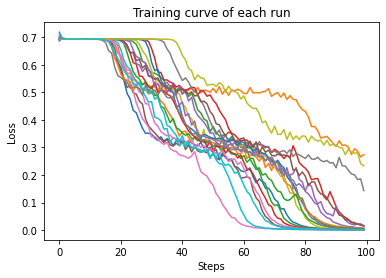

In [90]:
plot_losses(losses)

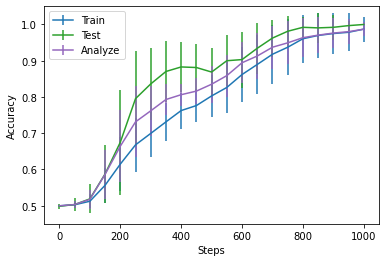

In [91]:
plot_accuracy(train_accs, test_accs, analyze_accs, analyze_every)